In [1]:
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline

# Swiss roll manifold learning

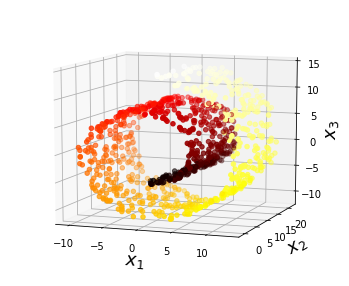

In [2]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("swiss_roll_plot")
plt.show()

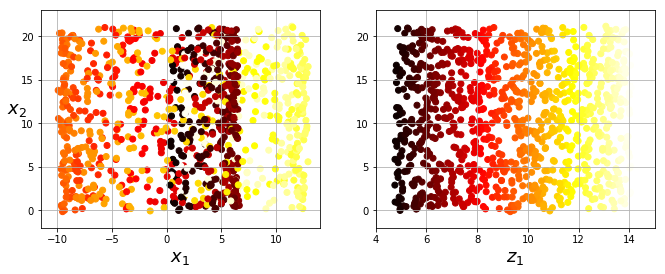

In [3]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

#save_fig("squished_swiss_roll_plot")
plt.show()

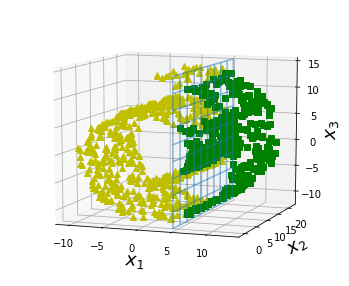

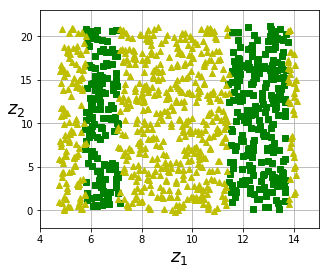

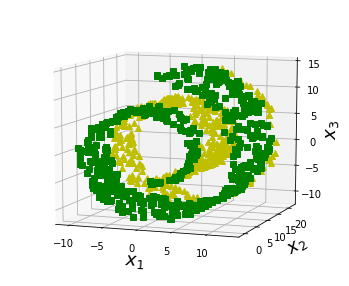

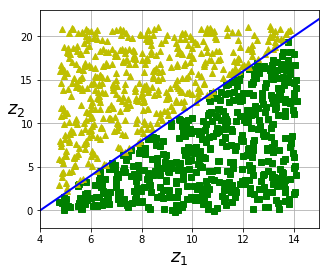

In [4]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

#save_fig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

#save_fig("manifold_decision_boundary_plot4")
plt.show()

# SVD

In [5]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [6]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn’s PCA classes take care of centering the data for you. However, if you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t forget to center the data first.

In [7]:
#take the first 2 columns
W2 = Vt.T[:, :2]
#project data 
X2D = X_centered.dot(W2)

# Using scikit learn
Scikit-Learn’s PCA class implements PCA using SVD decomposition just like we did before.

In [8]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2);
X2D = pca.fit_transform(X)

In [9]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

### The PC are the horizontal vector

Explained variance ratio of each prin‐ cipal component, available via the **explained_variance_ratio_** variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component. This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6% lies along the second axis. This leaves less than 1.2% for the third axis, so it is reason‐ able to assume that it probably carries little information.


In [10]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

 it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).

In [11]:
pca= PCA();
X2D = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_);
d = np.argmax(cumsum>= 0.95)+1#python index starts from 0, dimensionality from 1

In [12]:
cumsum

array([0.84248607, 0.98880446, 1.        ])

In [13]:
cumsum>= 0.95

array([False,  True,  True])

You could then set n_components=d and run PCA again. However, there is a much better option: instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum). There will usually be an elbow in the curve, where the explained variance stops growing fast. You can think of this as the intrinsic dimensionality of the datase. PCA can be used to compress data: in the MNIST data it will be found that only 150/784 pixels contain 95% of the variance.

The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the reconstruction error.

# MNIST

In [15]:
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [16]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
len(pca.components_)

154

In [19]:
pca_plot = PCA();
X2D = pca_plot.fit(X_train);

(0, 170)

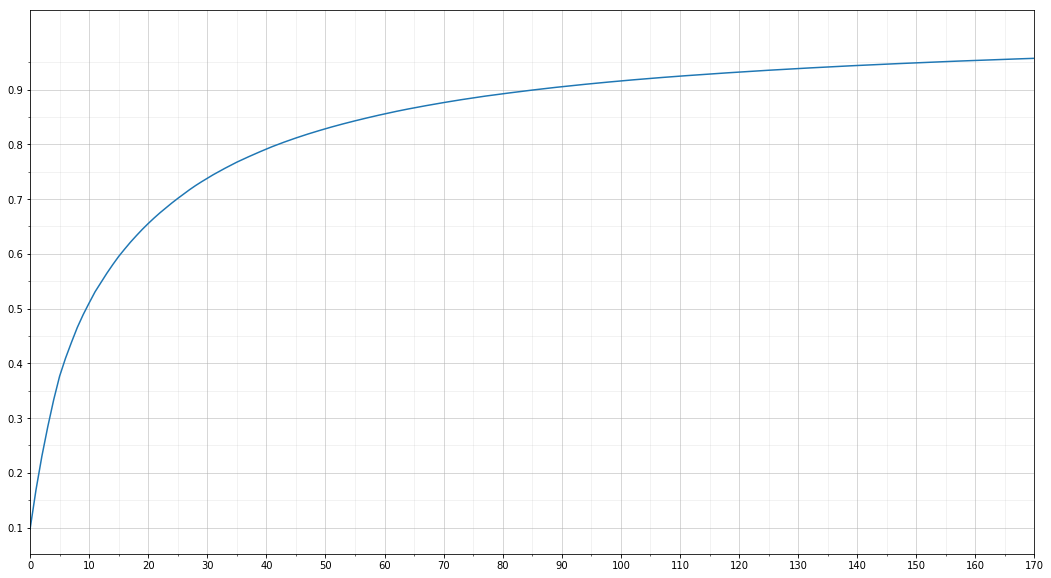

In [20]:
fig = plt.figure(figsize=(18,10))
cumsum = np.cumsum(pca_plot.explained_variance_ratio_);
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, 1, 0.1)
minor_ticks = np.arange(0, 1, 0.05)
major_yticks = np.arange(0, 800, 10)
minor_yticks = np.arange(0, 800, 5)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_xticks(major_yticks)
ax.set_xticks(minor_yticks, minor=True)
ax.grid(which='major', alpha=0.5)
ax.grid(which='minor', alpha=0.2)
plt.plot(cumsum)
plt.xlim([0,170])
#plt.grid(which='major', alpha=0.05)

In [21]:

pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [22]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
    


Text(0.5, 1.0, 'Compressed')

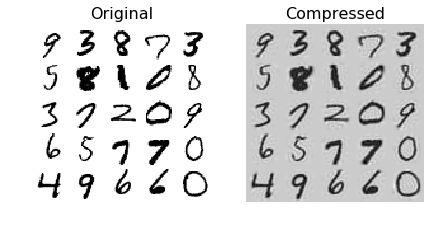

In [23]:
import matplotlib as mpl
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

 If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a sto‐ chastic algorithm called Randomized PCA that quickly finds an approximation of the first d principal components. 
 Its computational complexity is O(m × d2) + O(d3), instead of O(m × n2) + O(n3) for the full SVD approach, so it is dramatically faster than full SVD when d is much smaller than n:

In [24]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

One problem with the preceding implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run. Fortunately, Incremental PCA (IPCA) algorithms have been developed: you can split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).

The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class5 to reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like before). Note that you must call the partial_fit() method with each mini-batch rather than the fit() method with the whole training set:

In [25]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

Alternatively, you can use NumPy’s memmap class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory.
the class loads only the data it needs in memory, when it needs it. Since the IncrementalPCA class uses only a small part of the array at any given time, the memory usage remains under control. This makes it possible to call the usual fit() method, as you can see in the following code:

In [26]:
filename = "my_mnist.data"
m, n = X_train.shape
X_mm = np.memmap(filename, dtype="float32", mode="write", shape=(m, n))
X_mm[:] = X_train

Now deleting the `memmap()` object will trigger its Python finalizer, which ensures that the data is saved to disk.

Then reload the data

In [27]:
del X_mm

In [28]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

# Time complexity
Let's time regular PCA against Incremental PCA and Randomized PCA, for various number of principal components:

In [29]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 1.0 seconds
    IncrementalPCA: 14.4 seconds
    PCA: 1.0 seconds
n_components = 10
    PCA: 1.2 seconds
    IncrementalPCA: 15.6 seconds
    PCA: 1.2 seconds
n_components = 154
    PCA: 3.1 seconds
    IncrementalPCA: 20.2 seconds
    PCA: 3.1 seconds


Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

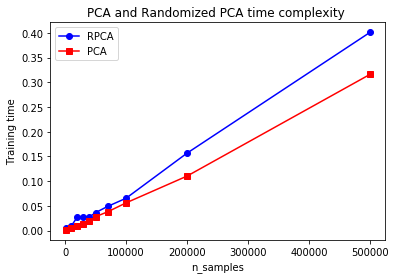

In [30]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

And now let's compare their performance on datasets of 2,000 instances with various numbers of features:

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

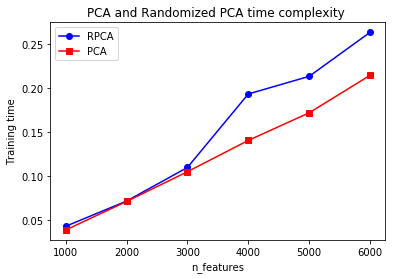

In [31]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

# Kernel PCA
Support Vector Machines Kernel trick maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space.
It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction (**Kerenel PCA**)

In [32]:
from sklearn.decomposition import KernelPCA
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04);
X_reduced = rbf_pca.fit_transform(X);

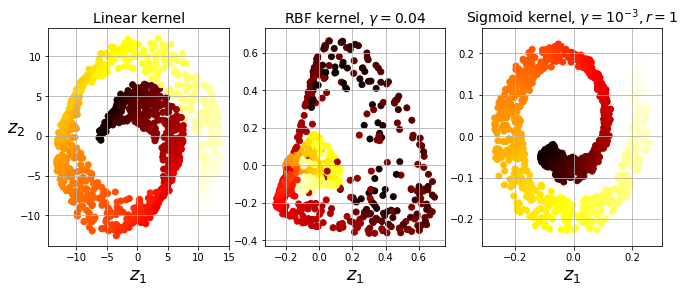

In [43]:
lin_pca = KernelPCA(n_components = 2, kernel="linear" , fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf"    , fit_inverse_transform=True, gamma=0.0433)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", fit_inverse_transform=True, gamma=0.001, coef0=1)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

## KPCA HYPERPARAMETERS
As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values. However, dimensionality reduction is often a preparation step for a supervised learning task (e.g., classification), so you can simply use grid search to select the kernel and hyper‐ parameters that lead to the best performance on that task. 

The following code creates a two-step pipeline, first reducing dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then it uses Grid SearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:
<a id='KPCA_preprocessing'></a>

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([('kpca', KernelPCA(n_components=2)), 
                ("log_reg", LogisticRegression(solver='lbfgs'))]);
param_grid = [{"kpca__gamma":np.linspace(0.03, 0.05, 10), 
              "kpca__kernel": ["rbf", "sigmoid"]}
             ];
grid_search = GridSearchCV(clf, param_grid, cv=3);
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRe...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [36]:
from sklearn.decomposition import KernelPCA

In [37]:
rbf_pca = KernelPCA(kernel='rbf',n_components=2, gamma=0.04, random_state=42);
lin_pca = KernelPCA(kernel='linear',n_components=2, gamma=0.04, random_state=42);
rbf_pca = KernelPCA(kernel='sigmoid',n_components=2, gamma=0.04, random_state=42)

In [44]:
rbf_pca.fit

<bound method KernelPCA.fit of KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=0.0433, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)>

KPCA is an unsupervised technique, so we cannot find its hyperparameters. When used as a preprocessing technique as [here](#KPCA_preprocessing) before applying another classification algorithm, we can use `GridSearch` to estimate the influence of hyperparameters on the pipeline consisting of the preprocessing and the classification algorithm. 

Another approach, this time entirely unsupervised, is to select the kernel and hyper‐ parameters that yield the lowest reconstruction error. However we cannot compute the reconstruction error: since PCA is applied on a new (infinite?) dimensional space due to the kernel. Data are projected from this new space onto a lower dimensional space. The reconstruction error would be given by reversing this projection, if we could (we can't because .  Since the feature space is infinite-dimensional, we cannot compute the reconstructed point, and therefore we cannot compute the true reconstruction error. Fortunately, it is pos‐ sible to find a point in the original space that would map close to the reconstructed point. This is called the reconstruction pre-image. Once you have this pre-image, you can measure its squared distance to the original instance.

### Pre-image problem

In [49]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                        fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.78630879576615

# Local linear embedding
Non-linear dimensionality reduction technique. It does not rely on projections like the previous algorithms. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.

first, for each training instance x(i), the algorithm identifies its
k closest neighbors (in the preceding code k = 10), then tries to reconstruct x(i) as a
linear function of these neighbors. More specifically, it finds the weights $w_i$,$j$ such that the squared distance between $x(i)$ and $\sum w_{ij} x^{(j)}$ is as small as possible, assuming $w_{ij}=0$ if $x(j)$ is not one of the k closest neighbors of $x(i)$. This is the first constraint.

The second constraint simply normalizes the weights for each training instance x(i).

$$\hat{W}= argmin \sum_{i=1}^m x_i − \sum_{i=1}^m w_{i,j}x_j$$
**subject to**
$$w_{i,j}=0 \quad\text{if $x_j$ is not one of the $k$ c.n.of $x_i$}$$
$$\sum_{j=1}^m w_{i,j} =1 for i=1,2,⋯,m$$


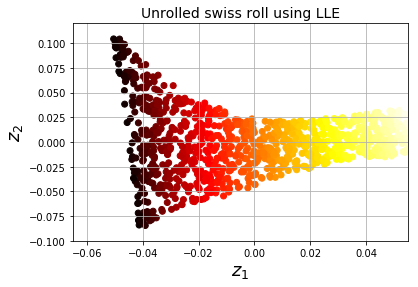

In [50]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

#save_fig("lle_unrolling_plot")
plt.show()

#### second step
After this step, the weight matrix W (containing the weights wi, j) encodes the local linear relationships between the training instances. Now the second step is to map the
training instances into a d-dimensional space (where d < n) while preserving these
local relationships as much as possible. 

If $z(i)$ is the image of x(i) in this d-dimensional space, then we want the squared distance between z(i) and $\sum^m_{j=1} w_{i,j} z^{(j)}$   to be as small
as possible. This idea leads to the unconstrained optimization problem. but instead of keeping the instan‐ ces fixed and finding the optimal weights, we are doing the reverse: keeping the weights fixed and finding the optimal position of the instances’ images in the low- dimensional space. $Z$ is the matrix containing all $z^{(i)}$.
$$\hat{Z} = argmin_{Z} \sum_{i=1}^m (z^{(i)} - \sum_{j=1}^m \hat{w}_{i,j} z^{(j)}$$

Scikit-Learn’s LLE implementation has the following computational complexity: $O(m\log(m)n \log(k))$ for finding the $k$ nearest neighbors, $O(mnk^3)$ for optimizing the weights, and $O(dm^2)$ for constructing the low-dimensional representations. Unfortunately, the m2 in the last term makes this algorithm scale poorly to very large datasets.

## Other techniques
 - **Multidimensional scaling**: reduces dimensionality while trying to preserve the distances between the instances
 - **Isomap** creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances9 between the instances.
 - **$t$-Distributed Stochastic Neighbor Embedding (t-SNE)** reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).
 - **LDA**: Linear Discriminant Analysis (LDA) is actually a classification algorithm, but dur‐ ing training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.
 

/Users/fra/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


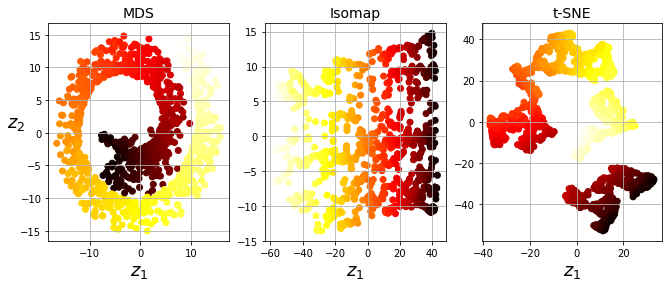

In [51]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("other_dim_reduction_plot")
plt.show()

# Exercises
## 1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?
### myanswer
One might want to reduce dimensionality for visualization purposes or to gain insights on data. In other case input space is to big and requires too computational power and sometimes data are might be highly correlated. The drawback is that the information loss related to the dimensionality reduction (very often obtained by projection).

### book:
The main motivations for dimensionality reduction are:
 - To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm per‐ form better).
 - To visualize the data and gain insights on the most important features.
 - Simply to save space (compression).
Drawbacks
- Some information is lost, possibly degrading the performance of subse‐ quent training algorithms.
- It can be computationally intensive.
- It adds some complexity to your Machine Learning pipelines.
- Transformed features are often hard to interpret.

## 2. What is the curse of dimensionality?
The curse of dimensionality is a term that indicates the need of more data as dimensionality increases.

#### book
The curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional space arise in high-dimensional space. In Machine Learning, one common manifestation is the fact that randomly sampled high- dimensional vectors are generally very sparse, increasing the risk of overfitting and making it very difficult to identify patterns in the data without having plenty of training data.

## 3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?
If the algorithm does not use a kernel (such as PCA) then yes, generally it can be easily reversed. The application of a kernel make it unreversable but it is possible to find an image whose mapping is close, according to some distance-measure to the reduced image.

#### book
Once a dataset’s dimensionality has been reduced using one of the algorithms we discussed, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction. Moreover, while some algorithms (such as PCA) have a simple reverse transformation pro‐ cedure that can reconstruct a dataset relatively similar to the original, other algo‐ rithms (such as T-SNE) do not.

## 4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?
PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions—for example, the Swiss roll—then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.

## 5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?
That’s a trick question: it depends on the dataset. Let’s look at two extreme exam‐ ples. First, suppose the dataset is composed of points that are almost perfectly aligned. In this case, PCA can reduce the dataset down to just one dimension while still preserving 95% of the variance. Now imagine that the dataset is com‐ posed of perfectly random points, scattered all around the 1,000 dimensions. In this case all 1,000 dimensions are required to preserve 95% of the variance. So the answer is, it depends on the dataset, and it could be any number between 1 and 1,000. Plotting the explained variance as a function of the number of dimensions is one way to get a rough idea of the dataset’s intrinsic dimensionality.

    
## 6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?
Regular PCA is the default, but it works only if the dataset fits in memory. Incre‐ mental PCA is useful for large datasets that don’t fit in memory, but it is slower than regular PCA, so if the dataset fits in memory you should prefer regular PCA. Incremental PCA is also useful for online tasks, when you need to apply PCA on the fly, every time a new instance arrives. Randomized PCA is useful when you want to considerably reduce dimensionality and the dataset fits in memory; in this case, it is much faster than regular PCA. Finally, Kernel PCA is useful for nonlinear datasets.

## 7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?
Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms pro‐ vide a reverse transformation. Alternatively, **if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then you can simply measure the performance of that second algorithm**; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.


## 8. Does it make any sense to chain two different dimensionality reduction algorithms?
It can absolutely make sense to chain two different dimensionality reduction algorithms. A common example is using PCA to quickly get rid of a large num‐ ber of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE. This two-step approach will likely yield the same performance as using LLE only, but in a fraction of the time.


## 9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?


In [65]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

#Train a Random Forest classifier on the dataset and 
#time how long it takes, then evaluate the resulting model on the test set.

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [66]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [67]:
print("Training took {:.2f}s".format(t1 - t0))

from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Training took 3.57s


0.9492

In [68]:
#Exercise: Next, use PCA to reduce the dataset's dimensionality, 
#with an explained variance ratio of 95%.*

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

#Exercise: Train a new Random Forest classifier on the reduced
#dataset and see how long it takes. Was training much faster?*

rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)



In [69]:
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 9.22s


Oh no! **Training is actually more than twice slower now!** How can that be? Well, as we saw in this chapter, **dimensionality reduction does not always lead to faster training time**: it depends on the dataset, the model and the training algorithm. See figure 8-6 (the `manifold_decision_boundary_plot*` plots above). If you try a softmax classifier instead of a random forest classifier, you will find that training time is reduced by a factor of 3 when using PCA. Actually, we will do this in a second, but first let's check the precision of the new random forest classifier.

*Exercise: Next evaluate the classifier on the test set: how does it compare to the previous classifier?*

In [70]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9009

It is **common for performance to drop slightly** when reducing dimensionality, because we do lose some useful signal in the process. However, **the performance drop is rather severe in this case**. So PCA really did not help: it slowed down training and reduced performance. :(

Let's see if it helps when using softmax regression:

In [71]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Training took 7.83s


/Users/fra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9255

Okay, so **softmax regression takes much longer to train on this dataset than the random forest classifier**, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:


In [72]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 2.49s


/Users/fra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Nice! Reducing dimensionality led to a 4× speedup. :)  Let's check the model's accuracy:

In [73]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

A very slight drop in performance, which might be a reasonable price to pay for a 4× speedup, depending on the application.

So there you have it: PCA can give you a formidable speedup... but not always!

## 10.

*Exercise: Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.*

The MNIST dataset was loaded above.
Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:



## 10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐ resent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [74]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

Now let's use Matplotlib's `scatter()` function to plot a scatterplot, using a different color for each digit:

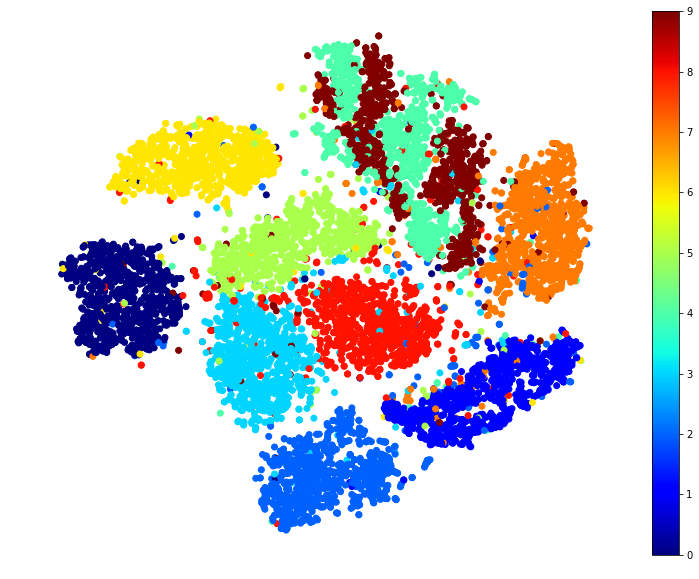

In [76]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Isn't this just beautiful? :) This plot tells us which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on).

Let's focus on digits 3 and 5, which seem to overlap a lot.

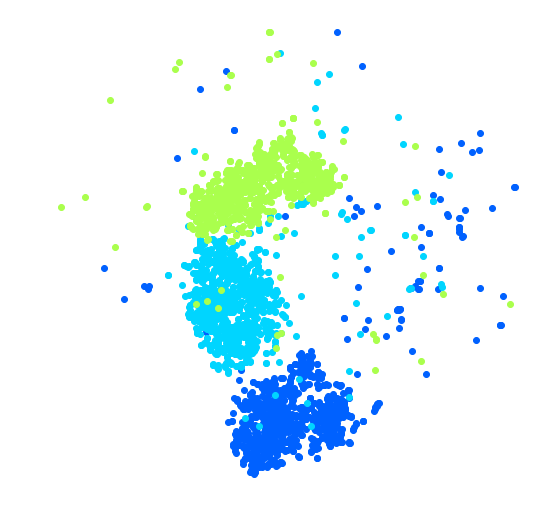

In [77]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Let's see if we can produce a nicer image by running t-SNE on these 3 digits:

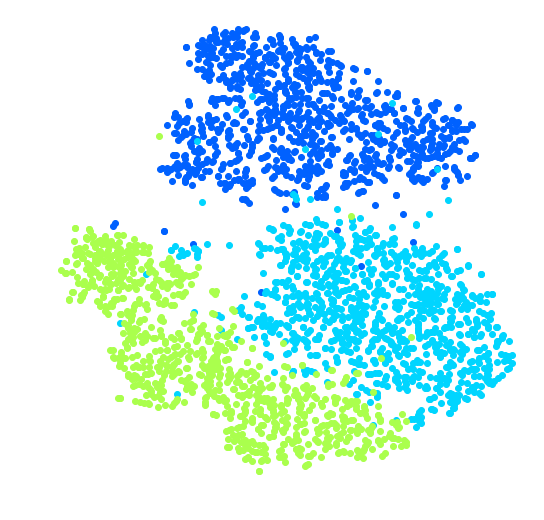

In [84]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Much better, now the clusters have far less overlap. But some 3s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 5s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now. 

*Exercise: Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.*

Let's create a `plot_digits()` function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples ([plot_lle_digits](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html), based on a different digit dataset).

In [87]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        #it just looks for a close label, does not care if it is different from its own.
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:#first iter is None if not passed as input
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)
            
            
    #print(neighbors)

Let's try it! First let's just write colored digits:

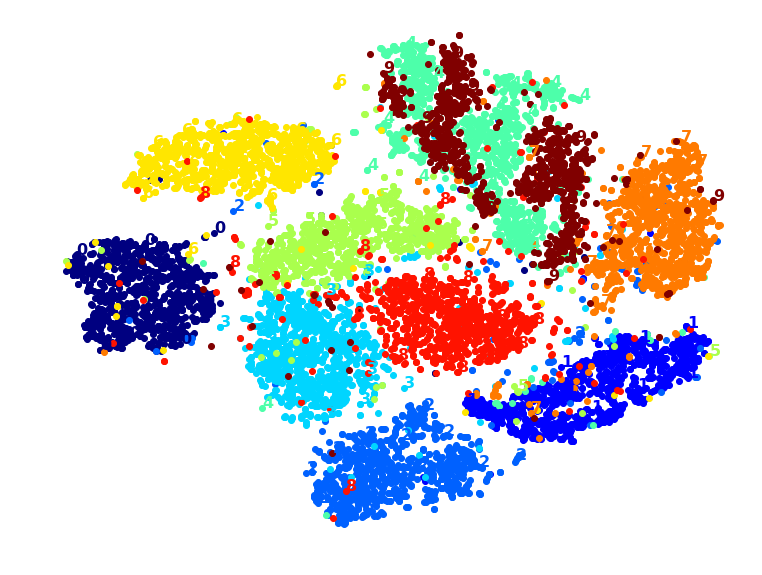

In [88]:
plot_digits(X_reduced, y)

Well that's okay, but not that beautiful. Let's try with the digit images:

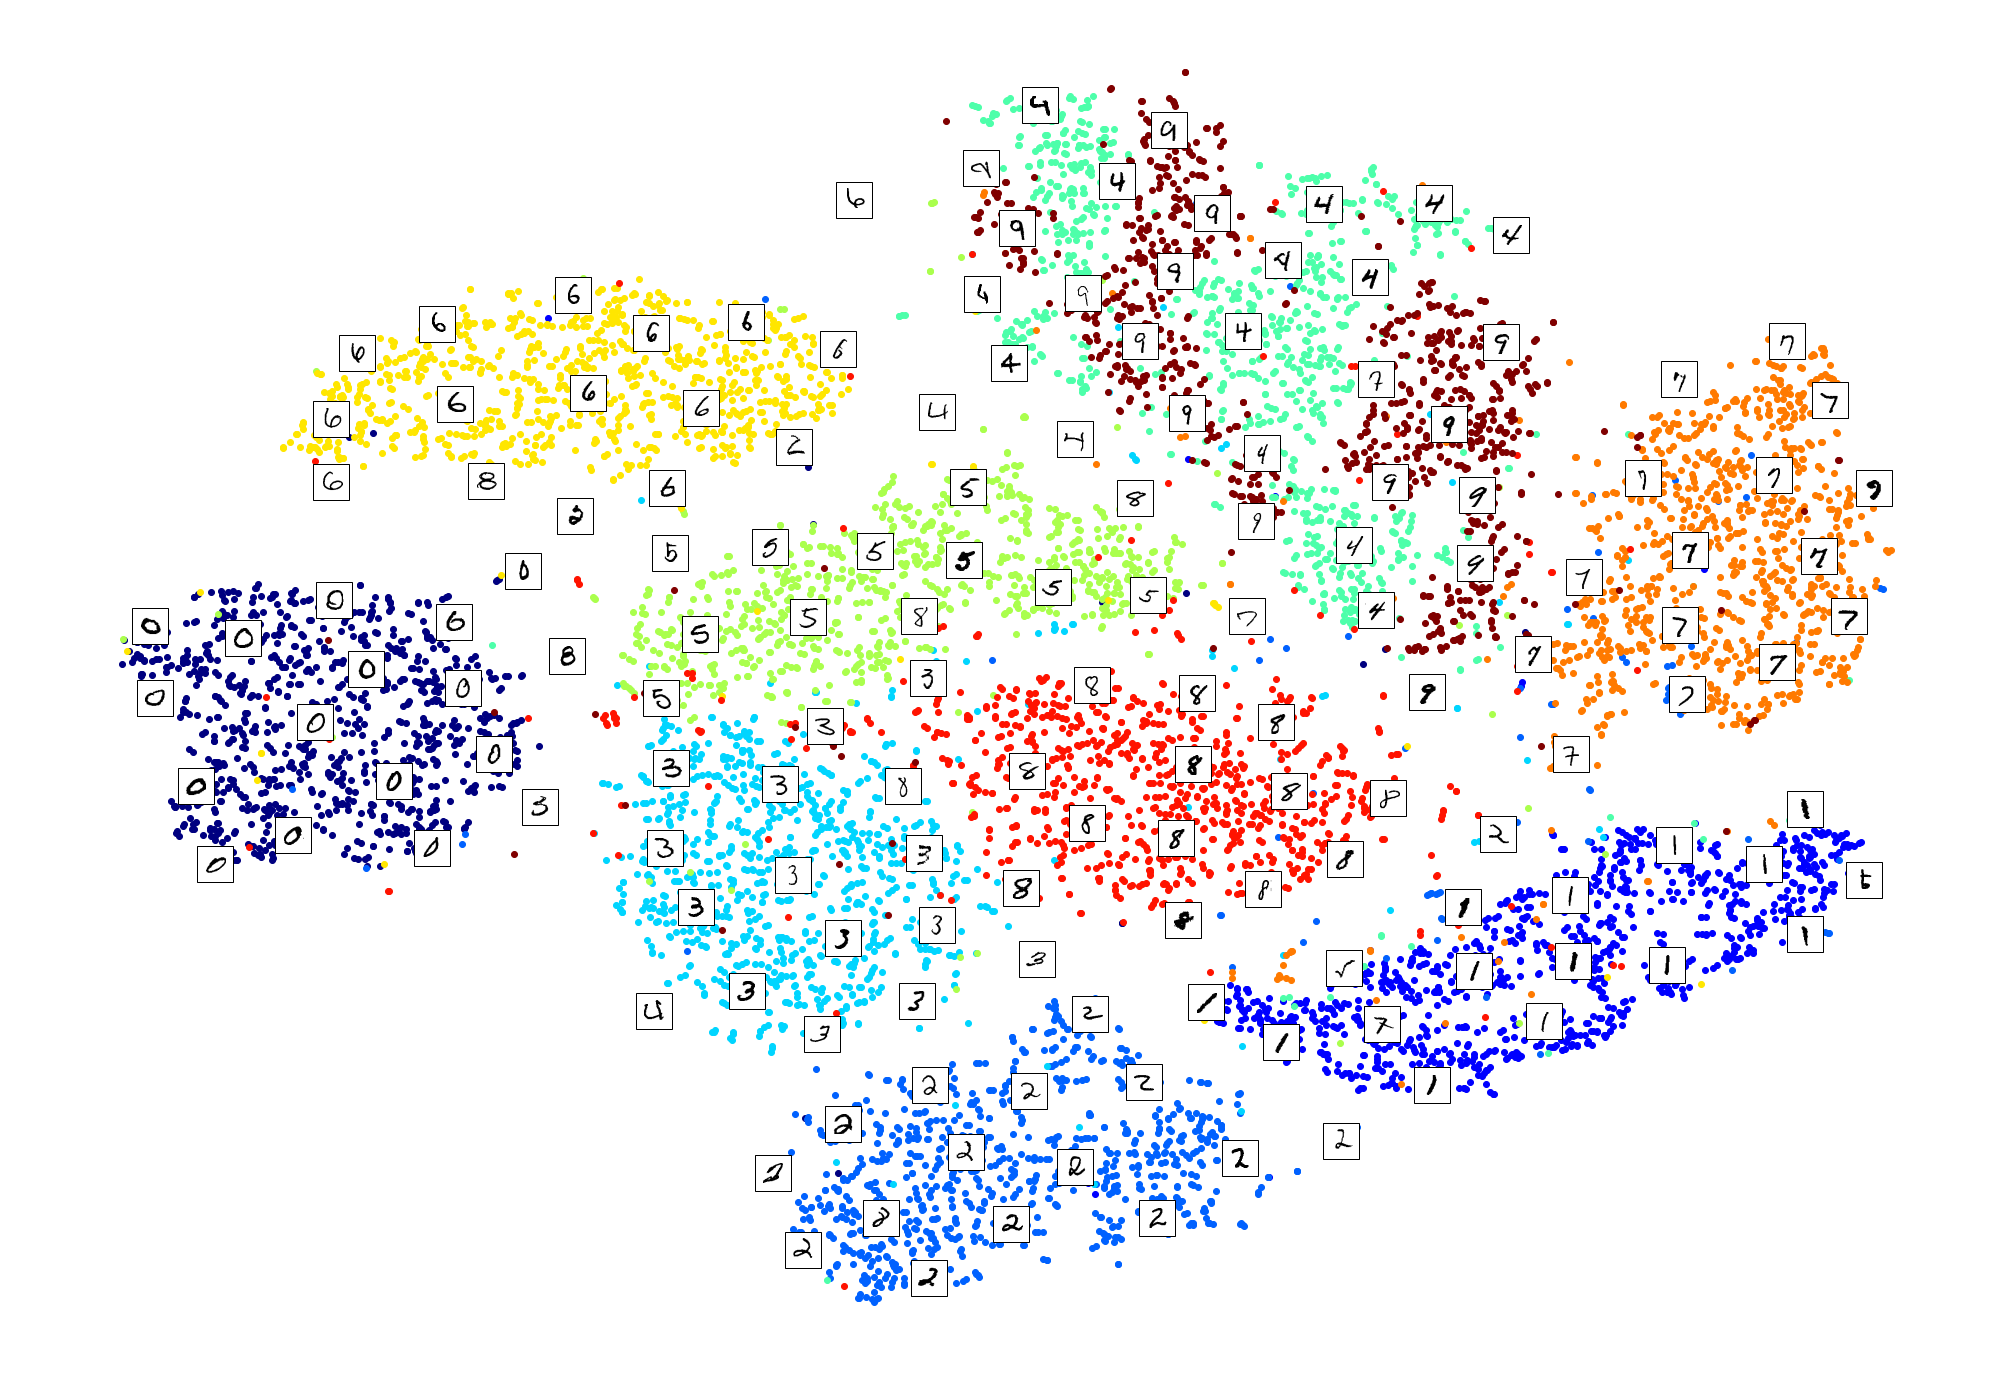

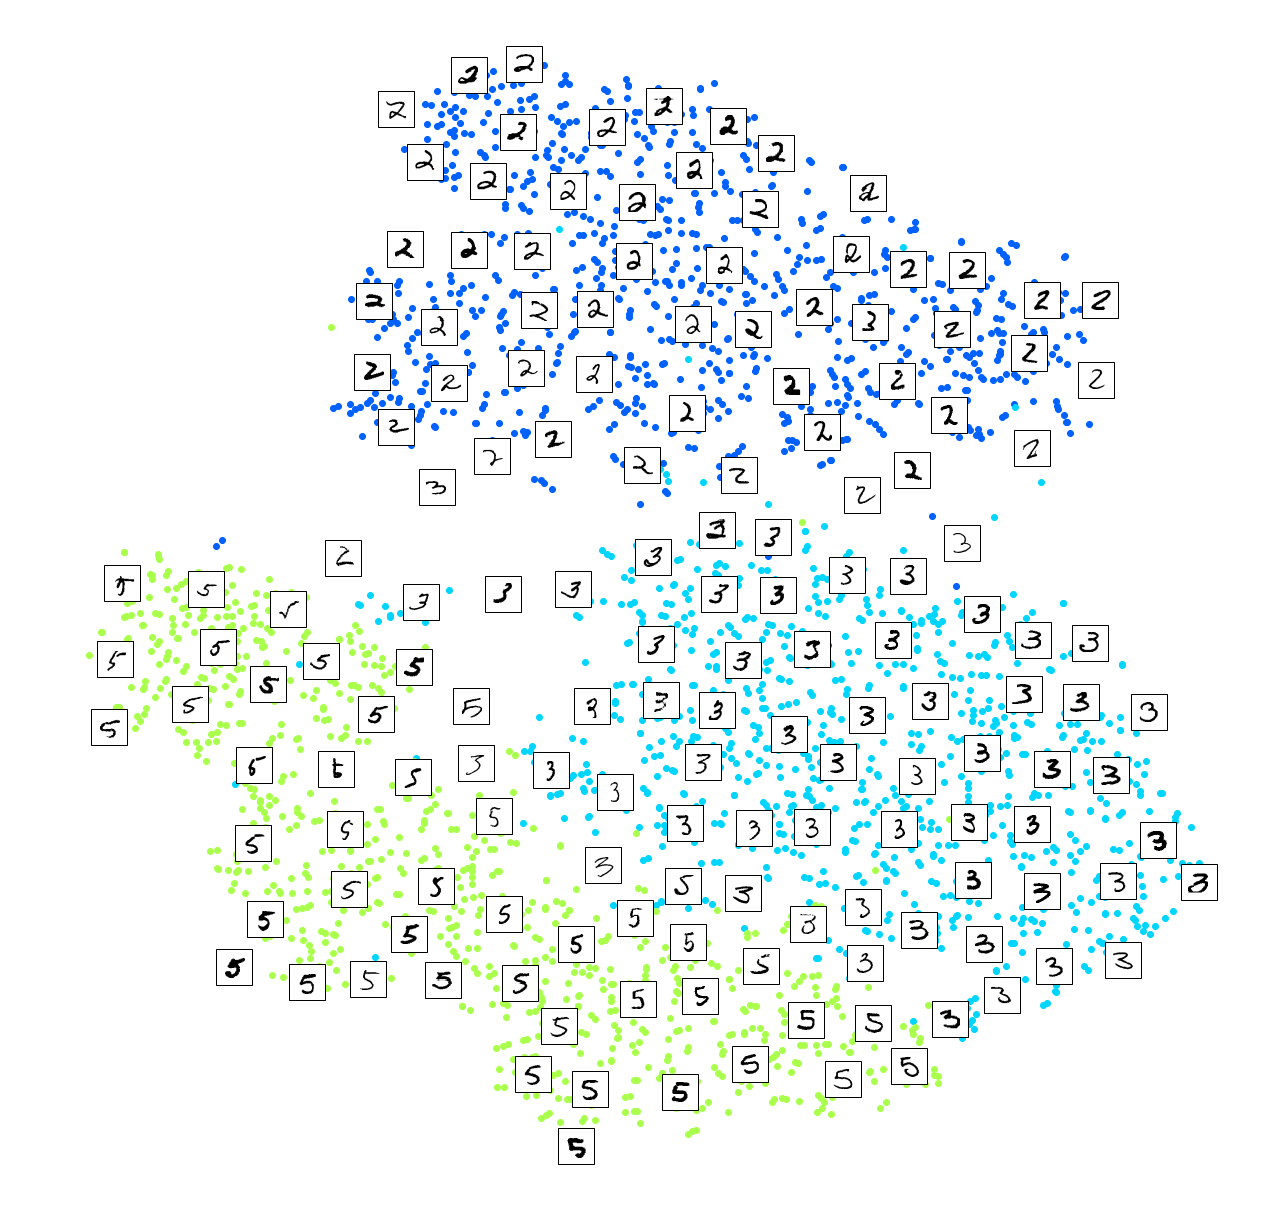

In [81]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

*Exercise: Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.*

Let's start with PCA. We will also time how long it takes:

PCA took 0.2s.


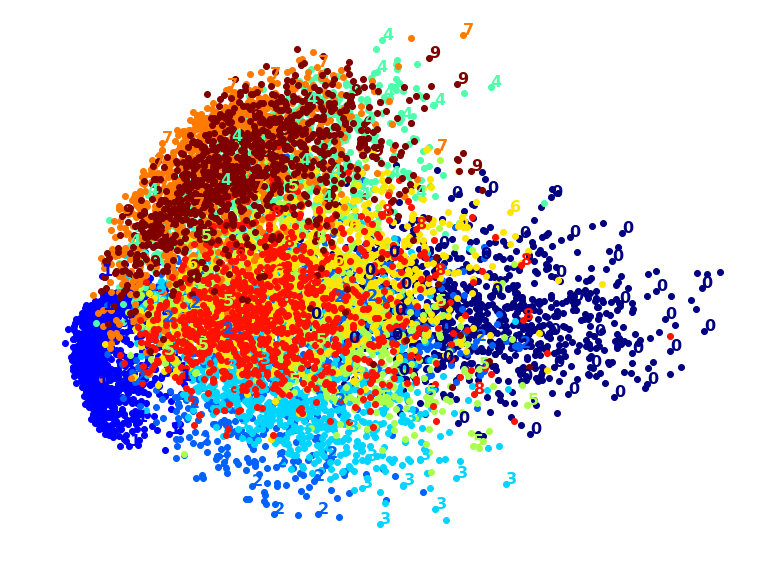

In [82]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

Wow, PCA is blazingly fast! But although we do see a few clusters, there's way **too much overlap**. Let's try LLE:

LLE took 106.8s.


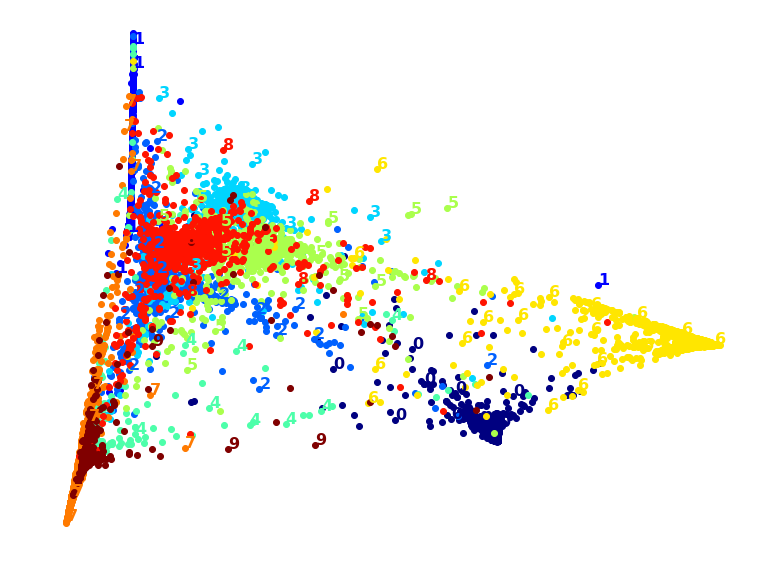

In [89]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

That took a while, and the **result does not look too good**. Let's see what happens if we apply PCA first, preserving 95% of the variance:

PCA+LLE took 35.4s.


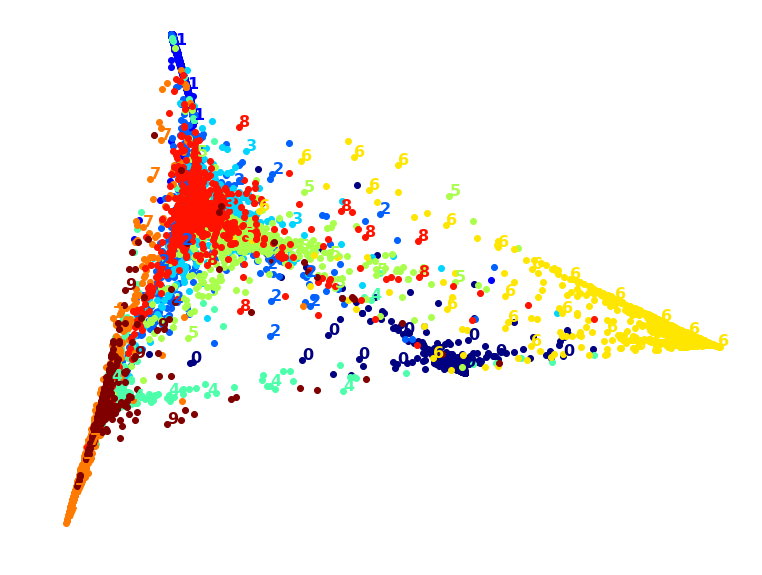

In [90]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

The result is more or less the same, but this time it was almost 4× faster.

Let's try MDS. It's much too long if we run it on 10,000 instances, so let's just try 2,000 for now:

MDS took 118.0s (on just 2,000 MNIST images instead of 10,000).


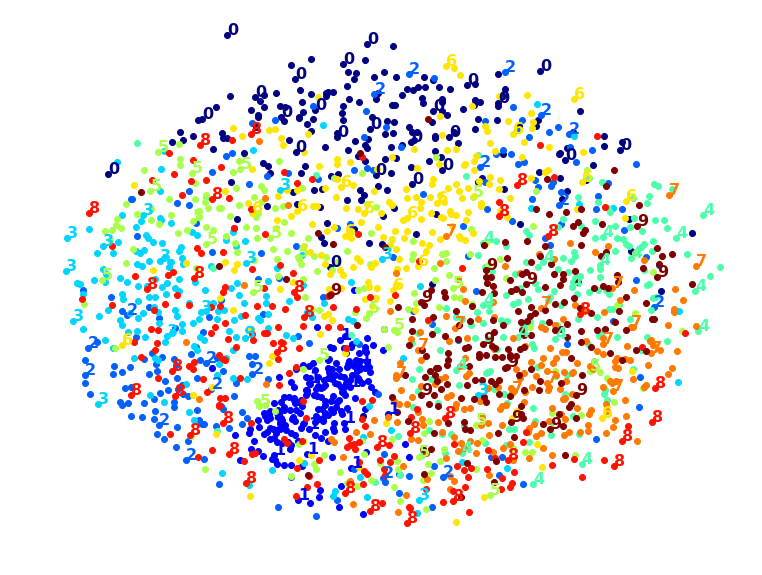

In [91]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

Meh. This does not look great, **all clusters overlap too much**. Let's try with PCA first, perhaps it will be faster?

PCA+MDS took 99.1s (on 2,000 MNIST images).


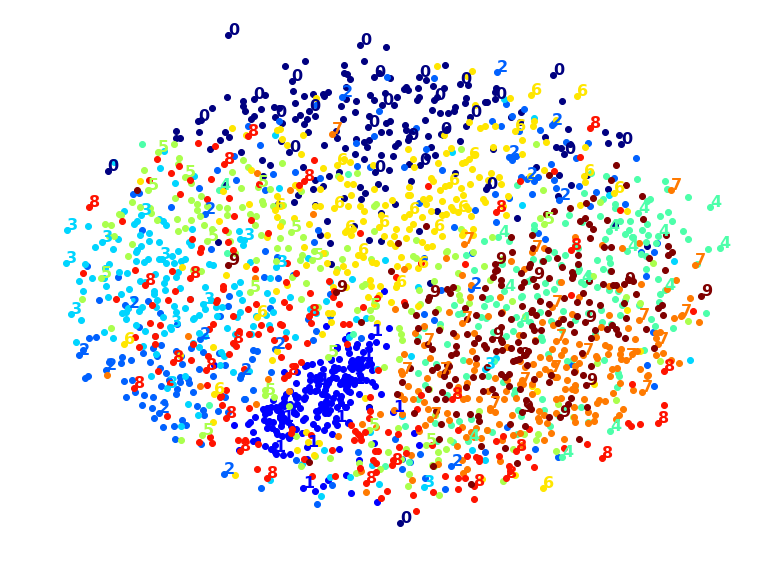

In [92]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

Same result, and no speedup: PCA did not help (or hurt).
Let's try LDA:

/Users/fra/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took 2.0s.


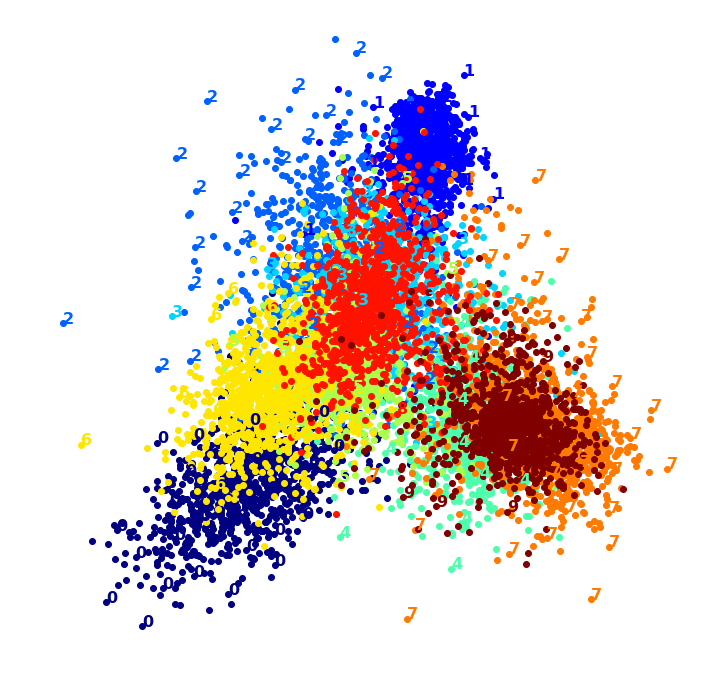

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

This one is very fast, and it looks nice at first, until you realize that several clusters overlap severely.

Well, it's pretty clear that **t-SNE won this little competition**, wouldn't you agree? We did not time it, so let's do that now:

t-SNE took 193.4s.


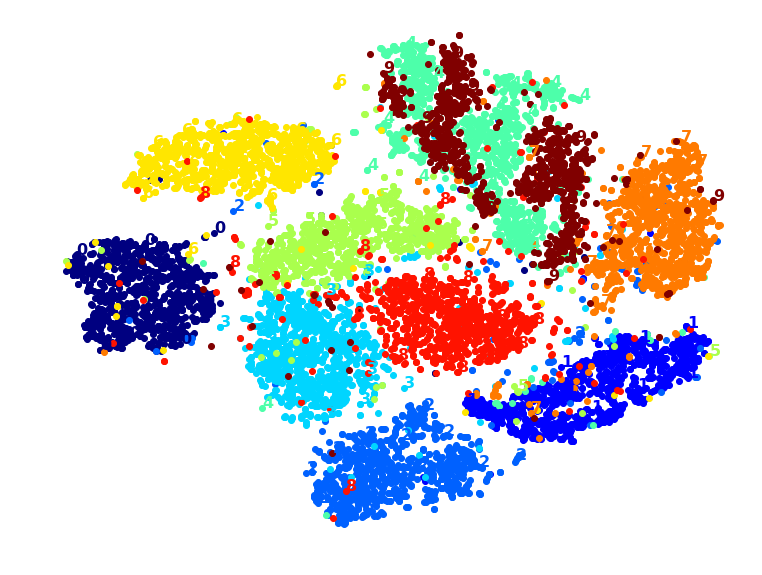

In [94]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

It's twice slower than LLE, but still much faster than MDS, and the result looks great. Let's see if a bit of PCA can speed it up:

PCA+t-SNE took 116.8s.


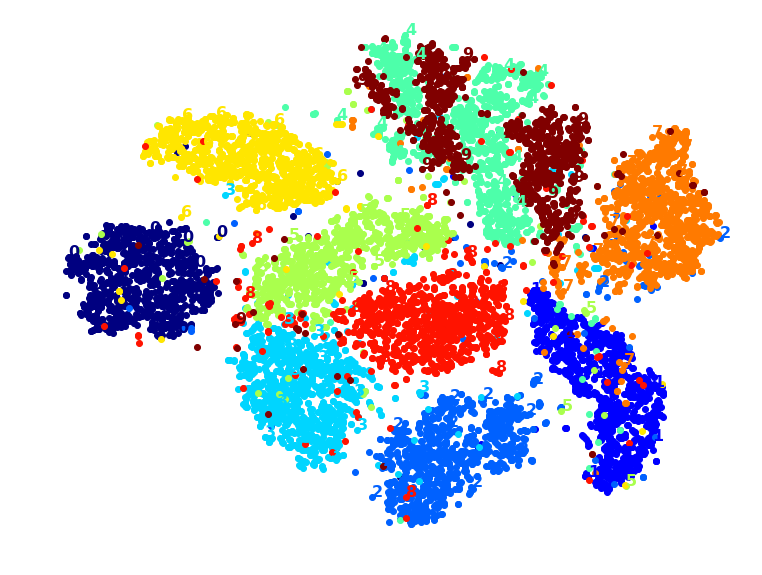

In [95]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

Yes, PCA roughly gave us a 25% speedup, without damaging the result. We have a winner!